<a href="https://colab.research.google.com/github/akhils-codes1/data-preprocessing-and-analysis/blob/main/allrounds_and_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install -Uqq fastai
!pip3 install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.7 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/MyDrive

In [ ]:
%cd /content/gdrive/MyDrive/diss

/content/gdrive/MyDrive/diss


In [ ]:
!ls

2_allrounds_and_random	allrounds2200png      pngdata
3_ri_vs_random		allrounds2200png.zip  pngdata02


In [ ]:
!unzip '/content/gdrive/MyDrive/diss/allrounds2200png.zip' -d '/content/gdrive/MyDrive/diss/'

Archive:  /content/gdrive/MyDrive/diss/allrounds2200png.zip
replace /content/gdrive/MyDrive/diss/allrounds2200png/2_1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/2_1.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/4_1.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/7_1.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/8_1.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/9_1.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/10_1.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/0_1.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/2_2.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/3_2.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/4_2.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/5_2.png  
  inflating: /content/gdrive/MyDrive/diss/allrounds2200png/6_2.png  
  inflat

In [ ]:
path = Path('/content/gdrive/MyDrive/diss/allrounds2200png')

In [ ]:
files = get_image_files(path)
files[0]

Path('/content/gdrive/MyDrive/diss/allrounds2200png/1_112.png')

In [ ]:
len(files)

2200

In [ ]:
pat = r'^(.*)_\d+.png'

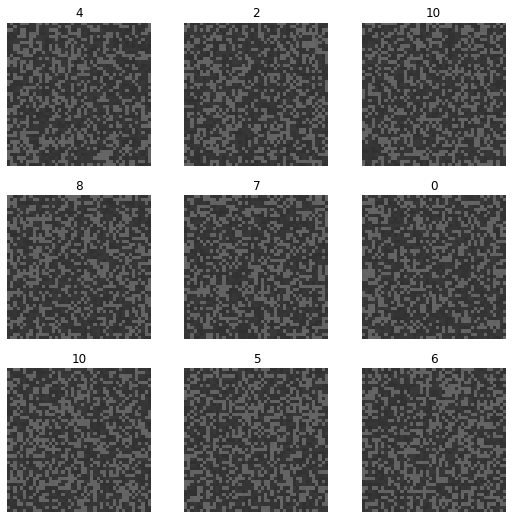

In [ ]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()

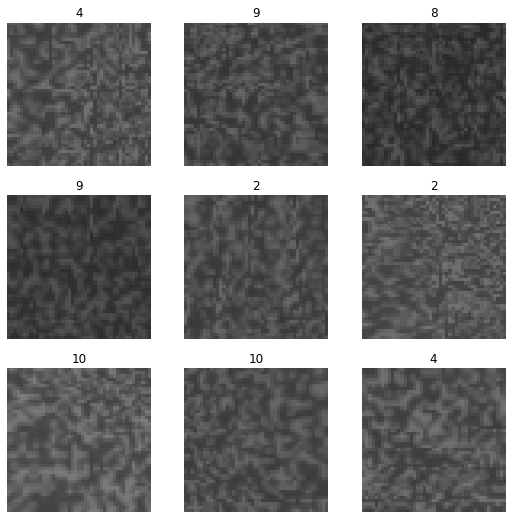

In [ ]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

#ConvNext

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth" to /root/.cache/torch/hub/checkpoints/convnext_nano_d1h-7eb4bdea.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.831226,2.571203,0.084091,00:06


epoch,train_loss,valid_loss,accuracy,time
0,3.286888,2.691093,0.040909,00:08
1,3.200412,2.918540,0.068182,00:06
2,3.098046,2.816537,0.063636,00:07
3,3.026012,3.115331,0.070455,00:06
4,2.938060,2.701488,0.047727,00:08
5,2.874728,2.512529,0.081818,00:06
6,2.805355,2.552700,0.047727,00:07
7,2.751799,2.537691,0.054545,00:06
8,2.670036,2.567068,0.054545,00:07
9,2.637371,2.567054,0.052273,00:06


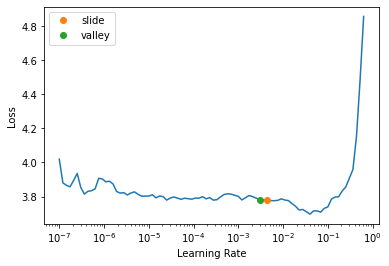

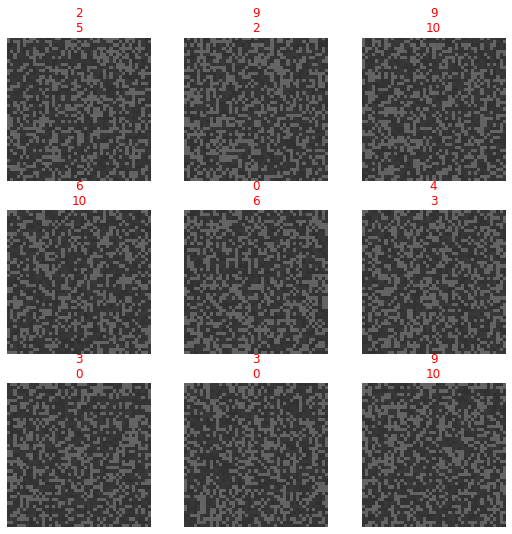

In [ ]:
# import timm
architecture = 'convnext_nano'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,3.675832,2.671111,0.097727,00:07


epoch,train_loss,valid_loss,accuracy,time
0,3.436336,2.687238,0.100000,00:06
1,3.379567,2.552174,0.088636,00:07
2,3.284378,2.533178,0.084091,00:06
3,3.198630,2.476140,0.081818,00:07
4,3.106205,2.439609,0.093182,00:06
5,3.036209,2.443696,0.086364,00:07
6,2.963362,2.435964,0.095455,00:06
7,2.923802,2.427746,0.079545,00:07
8,2.886167,2.429397,0.063636,00:07
9,2.874099,2.425931,0.072727,00:07


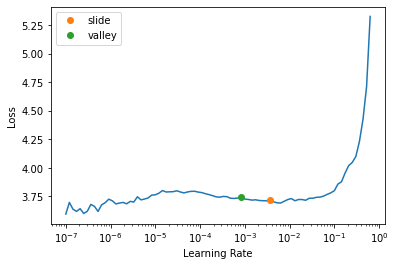

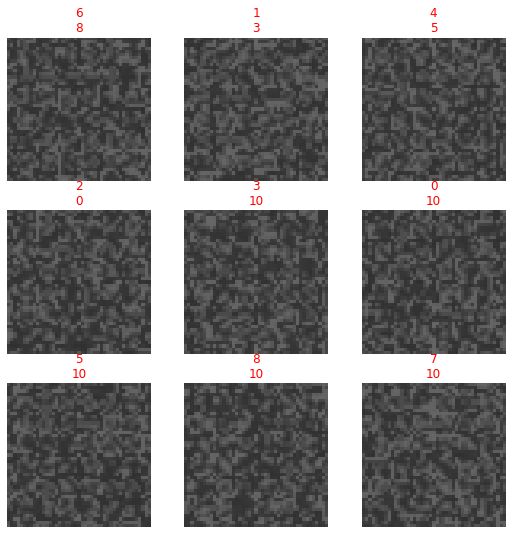

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNet34

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34-43635321.pth" to /root/.cache/torch/hub/checkpoints/resnet34-43635321.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.858303,2.811747,0.079545,00:07


epoch,train_loss,valid_loss,accuracy,time
0,3.417144,3.037088,0.077273,00:06
1,3.350999,3.393711,0.038636,00:07
2,3.268790,3.458486,0.047727,00:06
3,3.125411,3.224728,0.038636,00:08
4,2.995703,3.188254,0.038636,00:06
5,2.867537,3.159077,0.031818,00:07
6,2.743170,3.166933,0.034091,00:06
7,2.661474,3.058546,0.034091,00:07
8,2.602369,3.033957,0.031818,00:06
9,2.543889,3.055396,0.036364,00:08


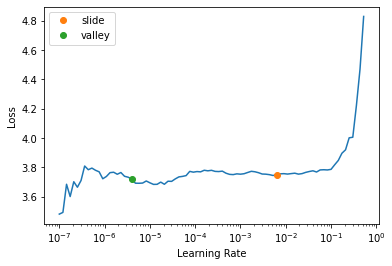

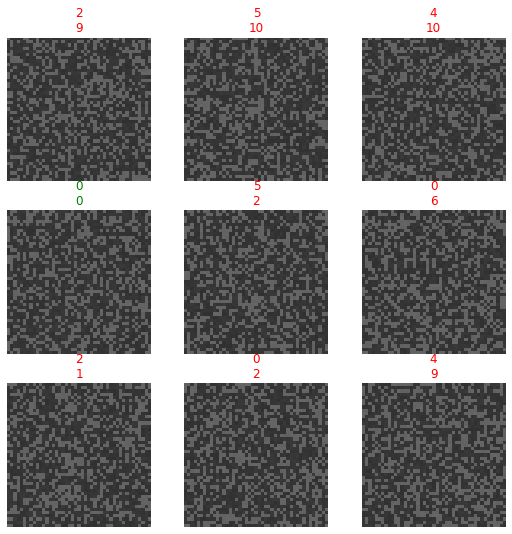

In [ ]:
architecture = 'resnet34'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,3.798207,2.819656,0.086364,00:07


epoch,train_loss,valid_loss,accuracy,time
0,3.557896,2.807508,0.072727,00:06
1,3.566638,2.761745,0.086364,00:07
2,3.496378,2.687834,0.084091,00:06
3,3.386699,2.696855,0.077273,00:07
4,3.337267,2.700830,0.093182,00:06
5,3.273797,2.655363,0.102273,00:06
6,3.182546,2.612021,0.084091,00:06
7,3.135066,2.584348,0.090909,00:06
8,3.123430,2.593950,0.100000,00:06
9,3.081378,2.577177,0.102273,00:06


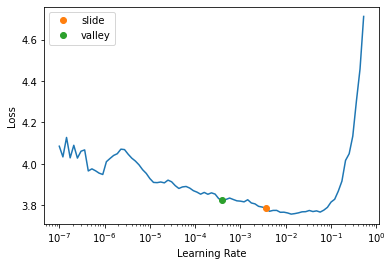

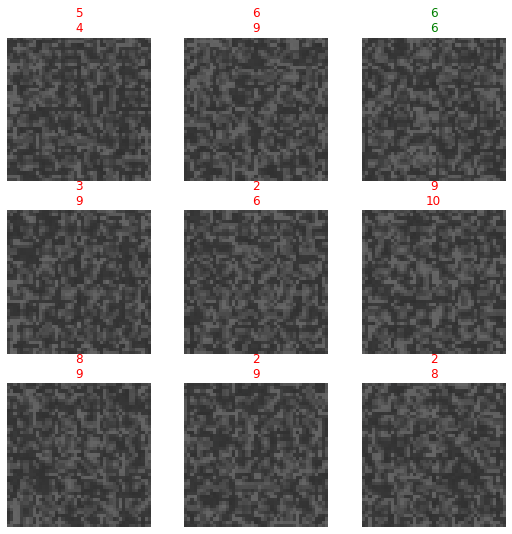

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNet152

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.963839,2.792550,0.090909,00:08


epoch,train_loss,valid_loss,accuracy,time
0,3.667438,13.161188,0.111364,00:10
1,3.593307,7.750163,0.061364,00:08
2,3.547175,11.301858,0.034091,00:09
3,3.398859,16.714243,0.050000,00:10
4,3.284753,14.149363,0.043182,00:09
5,3.153581,8.830310,0.050000,00:09
6,3.044110,8.540580,0.068182,00:10
7,2.980683,7.522078,0.059091,00:09
8,2.914601,8.640765,0.040909,00:08
9,2.856036,22.045948,0.040909,00:10


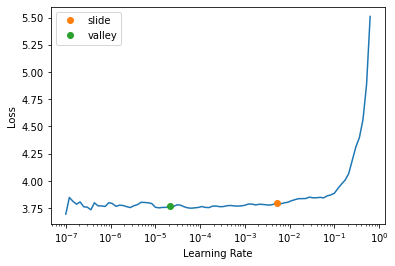

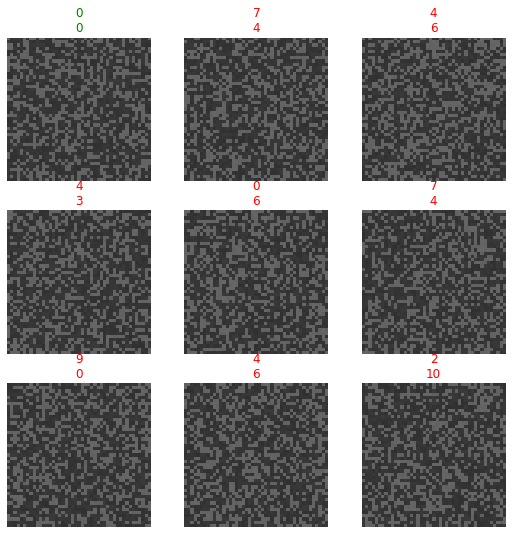

In [ ]:
architecture = 'resnet152'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,4.013343,3.189995,0.077273,00:07


epoch,train_loss,valid_loss,accuracy,time
0,4.025003,3.366747,0.095455,00:10
1,3.841009,2.767865,0.079545,00:09
2,3.660195,2.728665,0.077273,00:08
3,3.520729,2.572391,0.084091,00:10
4,3.386942,2.624217,0.059091,00:10
5,3.257981,2.551028,0.100000,00:09
6,3.161504,2.563784,0.100000,00:09
7,3.052562,2.537905,0.063636,00:10
8,2.939765,2.530656,0.063636,00:09
9,2.853098,2.479871,0.088636,00:08


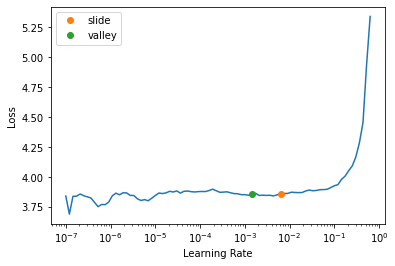

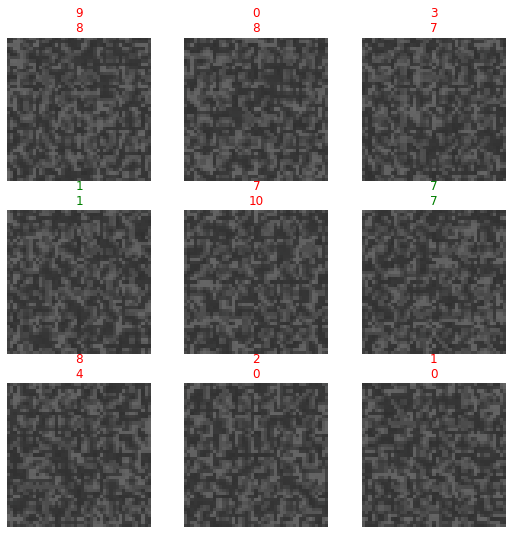

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(30,lr)
learn.show_results()

#densenet121

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


epoch,train_loss,valid_loss,accuracy,time
0,4.065095,4.011300,0.100000,00:08


epoch,train_loss,valid_loss,accuracy,time
0,3.517247,3.832004,0.070455,00:08
1,3.416063,3.983819,0.043182,00:09
2,3.329617,4.049757,0.034091,00:09
3,3.234733,3.902589,0.036364,00:08
4,3.065578,3.626913,0.059091,00:09
5,2.894978,3.526097,0.054545,00:11
6,2.761851,3.404984,0.052273,00:08
7,2.663538,3.385178,0.047727,00:09
8,2.568761,3.397727,0.047727,00:09
9,2.501838,3.354767,0.043182,00:08


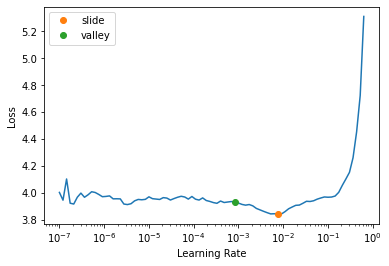

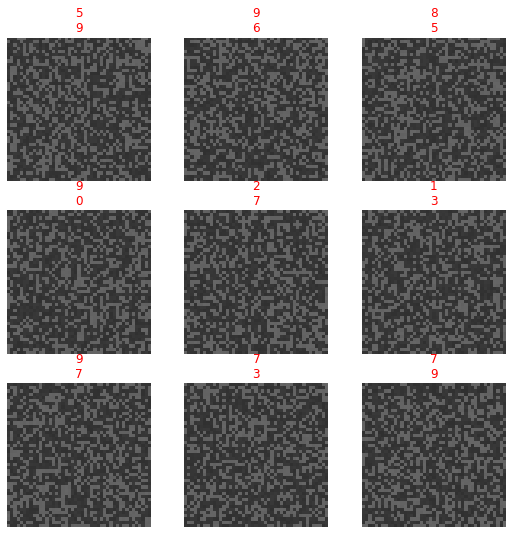

In [ ]:
architecture = 'densenet121'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,3.874635,3.232690,0.081818,00:08


epoch,train_loss,valid_loss,accuracy,time
0,3.745794,2.692446,0.086364,00:08
1,3.680018,3.734260,0.088636,00:09
2,3.592658,3.401159,0.084091,00:09
3,3.557343,5.520665,0.075000,00:08
4,3.454038,4.641174,0.075000,00:09
5,3.375030,8.250202,0.075000,00:09
6,3.299404,3.812907,0.093182,00:08
7,3.250998,4.653028,0.079545,00:09
8,3.194664,5.263553,0.077273,00:09
9,3.168285,7.783755,0.077273,00:08


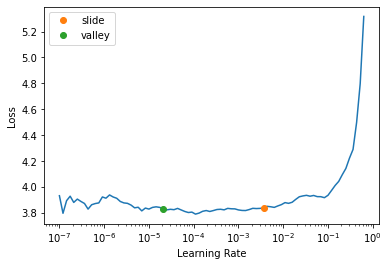

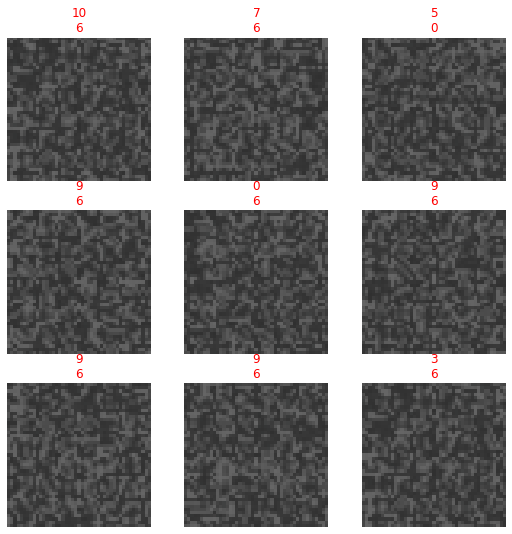

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#darknet53

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/darknet53_256_c2ns-3aeff817.pth" to /root/.cache/torch/hub/checkpoints/darknet53_256_c2ns-3aeff817.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.934432,3.135333,0.093182,00:06


epoch,train_loss,valid_loss,accuracy,time
0,3.271914,2.896558,0.063636,00:07
1,3.158602,3.144554,0.027273,00:06
2,3.027355,3.126831,0.036364,00:08
3,2.932163,3.130335,0.050000,00:06
4,2.827060,2.954574,0.050000,00:08
5,2.730343,2.921418,0.050000,00:06
6,2.629799,2.980044,0.036364,00:07
7,2.553742,2.858097,0.059091,00:06
8,2.457547,2.773565,0.056818,00:07
9,2.397196,2.751163,0.056818,00:06


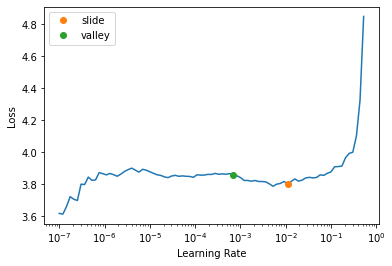

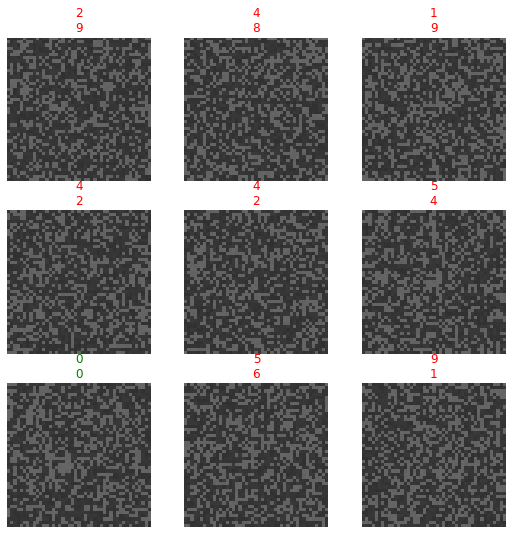

In [ ]:
architecture = 'darknet53'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,3.637228,3.002410,0.084091,00:06


epoch,train_loss,valid_loss,accuracy,time
0,3.597475,3.240394,0.106818,00:07
1,3.596260,3.010147,0.106818,00:07
2,3.561454,2.968532,0.075000,00:07
3,3.465400,2.882964,0.070455,00:07
4,3.370228,2.934040,0.090909,00:06
5,3.322774,2.853323,0.100000,00:07
6,3.258623,2.862981,0.095455,00:06
7,3.224598,2.684951,0.115909,00:08
8,3.169046,2.861926,0.109091,00:06
9,3.131740,2.640949,0.097727,00:08


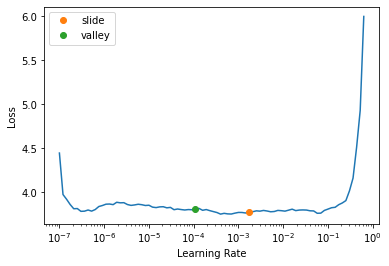

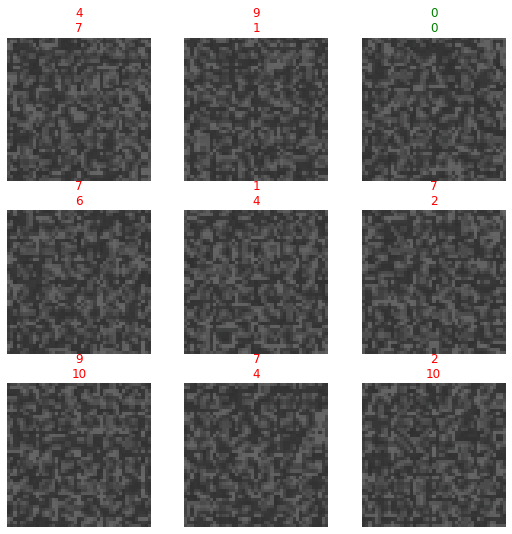

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#pnasnet5large

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/pnasnet5large-bf079911.pth" to /root/.cache/torch/hub/checkpoints/pnasnet5large-bf079911.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.413750,2.515461,0.090909,00:10


epoch,train_loss,valid_loss,accuracy,time
0,3.096275,2.622840,0.095455,00:13
1,3.042948,2.959505,0.063636,00:13
2,3.001069,3.072066,0.070455,00:13
3,3.023661,3.075228,0.093182,00:13
4,3.017337,3.058053,0.063636,00:13
5,2.974825,2.991493,0.063636,00:13
6,2.964759,3.138934,0.045455,00:13
7,2.900585,2.946954,0.047727,00:13
8,2.876225,2.923184,0.047727,00:13
9,2.836337,2.923311,0.047727,00:13


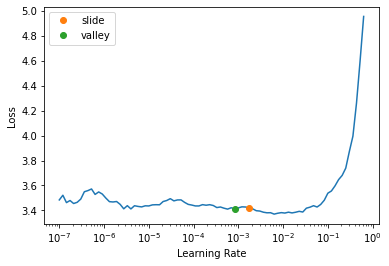

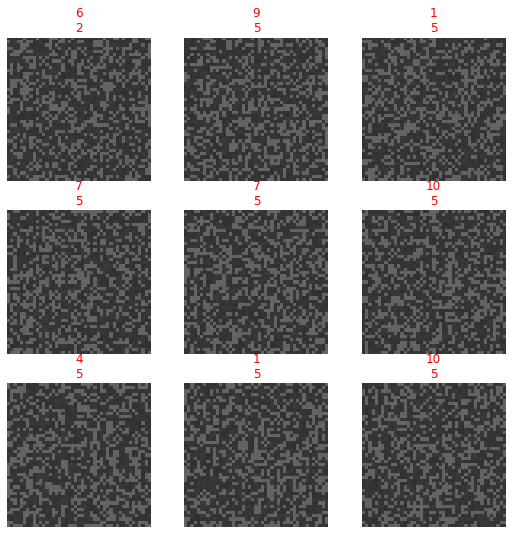

In [ ]:
architecture = 'pnasnet5large'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,3.444910,2.413898,0.109091,00:11


epoch,train_loss,valid_loss,accuracy,time
0,3.206409,2.659277,0.088636,00:14
1,3.159833,3.187225,0.077273,00:14
2,3.129551,3.041387,0.077273,00:13
3,3.096059,2.959044,0.077273,00:13
4,3.023251,3.042201,0.093182,00:14
5,3.020298,2.740977,0.068182,00:13
6,3.014331,2.713140,0.081818,00:13
7,2.985117,2.792718,0.088636,00:14
8,2.957722,2.727723,0.077273,00:13
9,2.951584,2.654353,0.081818,00:14


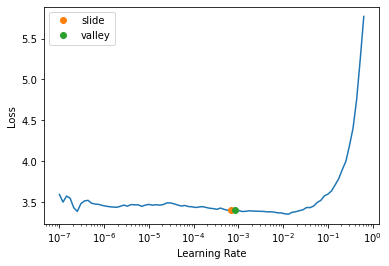

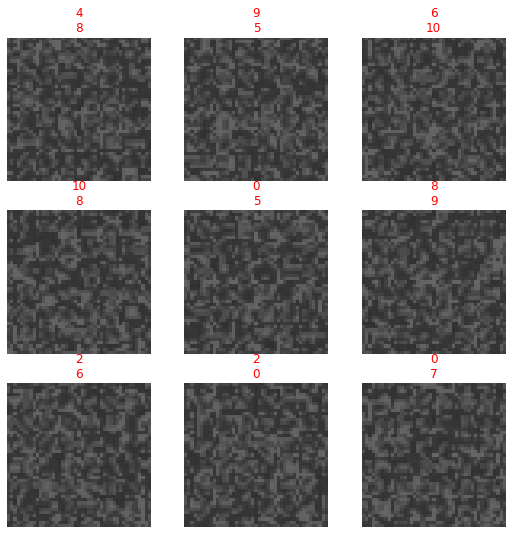

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNext101_64x4d

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/resnext101_64x4d_c-0d0e0cc0.pth" to /root/.cache/torch/hub/checkpoints/resnext101_64x4d_c-0d0e0cc0.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.998737,4.059767,0.090909,00:09


epoch,train_loss,valid_loss,accuracy,time
0,3.755308,3.767880,0.075000,00:08
1,3.603008,3.798604,0.043182,00:10
2,3.514066,3.917895,0.038636,00:10
3,3.441109,3.966196,0.045455,00:09
4,3.309125,3.764191,0.031818,00:10
5,3.163414,3.601459,0.040909,00:10
6,3.041058,3.585593,0.038636,00:09
7,2.951741,3.521990,0.047727,00:09
8,2.852828,3.461646,0.045455,00:10
9,2.817442,3.455802,0.045455,00:10


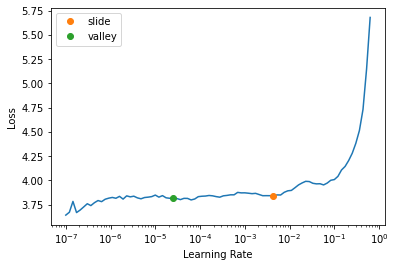

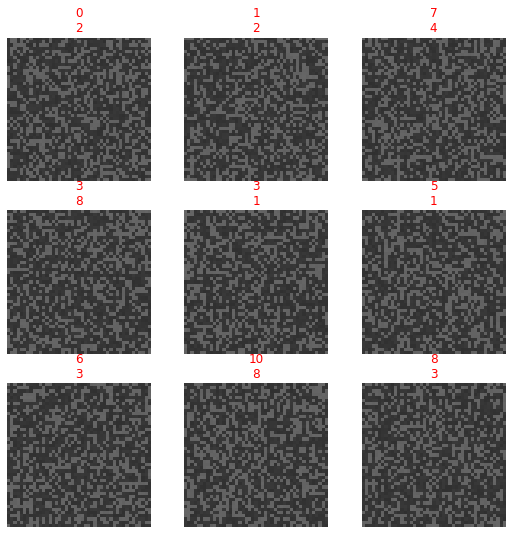

In [ ]:
architecture = 'resnext101_64x4d'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,3.975906,3.995766,0.084091,00:08


epoch,train_loss,valid_loss,accuracy,time
0,3.955006,3.754034,0.072727,00:09
1,3.727864,3.323931,0.081818,00:10
2,3.480821,2.933416,0.086364,00:10
3,3.271270,2.894599,0.102273,00:09
4,3.102159,2.759501,0.077273,00:10
5,2.975865,2.687180,0.063636,00:10
6,2.880480,2.705009,0.072727,00:09
7,2.805799,2.603437,0.090909,00:09
8,2.744206,2.544783,0.075000,00:10
9,2.716392,2.557411,0.081818,00:10


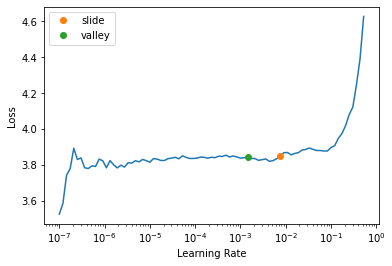

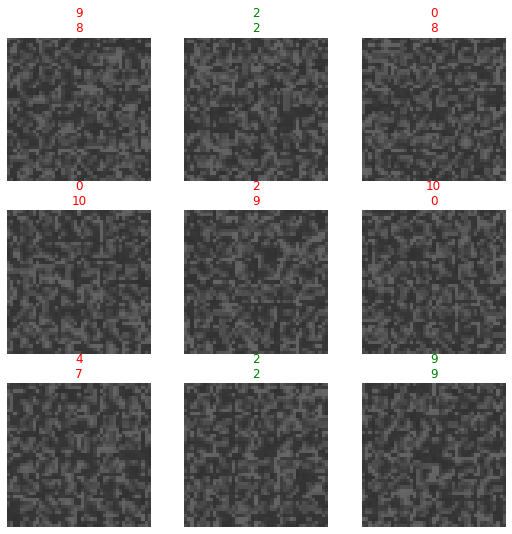

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()